<a href="https://colab.research.google.com/github/hassanaftab93/MyMasjid-Logs/blob/main/Logs_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logs Analysis

## Installation of Libraries

In [1]:
!pip install --upgrade pandas
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install zipfile-deflate64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.7 MB/s 


In [3]:
import pandas as pd
import numpy as np
from google.colab import files

In [4]:
import glob
from zipfile import ZipFile
import zipfile_deflate64 as zipfile
from pathlib import Path
import os
import fnmatch
import csv
import re

## [NEW] Configuring Google Cloud Storage Access



---



In [5]:
from google.colab import auth
auth.authenticate_user()

In [6]:
!curl https://sdk.cloud.google.com | bash

Streaming output truncated to the last 5000 lines.
google-cloud-sdk/lib/surface/run/services/update_traffic.py
google-cloud-sdk/lib/surface/runtime_config/__init__.py
google-cloud-sdk/lib/surface/runtime_config/configs/__init__.py
google-cloud-sdk/lib/surface/runtime_config/configs/create.py
google-cloud-sdk/lib/surface/runtime_config/configs/delete.py
google-cloud-sdk/lib/surface/runtime_config/configs/describe.py
google-cloud-sdk/lib/surface/runtime_config/configs/list.py
google-cloud-sdk/lib/surface/runtime_config/configs/update.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/__init__.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/describe.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/get_value.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/list.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/set.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/unset.py
google-cloud-sdk/lib/surfa

In [7]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
core:
  account: hassanaftab.pk@gmail.com

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you would like to use to perform operations for this 
configuration:
 [1] hassanaftab.pk@gmail.com
 [2] Log in with a new account
Please enter your numeric choice:  1

You are logged in as: [hassanaftab.pk@gmail.com].

Pick cloud project to use: 
 [1] my-masjid-0786
 [2] Enter a project ID
 [3] 

### Google Colab -> <- GCP

Google Cloud -> Colab

`!gsutil cp [GCP Storage path] [Copy to where?]` <br>
e.g <br>
`!gsutil cp gs://maskaravivek-data/data_file.csv .`

Colab -> Google Cloud

`gsutil cp [File] [GCP Storage path]` <br>
e.g <br>
`gsutil cp test.csv gs://maskaravivek-data/`

## Copying all Raw Logs data from GCP Storage

In [8]:
!gsutil ls

gs://mymasjid-logs-october/
gs://mymasjid-raw-logs/


In [9]:
!gsutil cp gs://mymasjid-raw-logs/'MM Log files'/* .

Copying gs://mymasjid-raw-logs/MM Log files/01 January.zip...
Copying gs://mymasjid-raw-logs/MM Log files/02 February.zip...
Copying gs://mymasjid-raw-logs/MM Log files/03 March.zip...
Copying gs://mymasjid-raw-logs/MM Log files/04 April.zip...
\ [4 files][859.0 MiB/859.0 MiB]   69.4 MiB/s                                   
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://mymasjid-raw-logs/MM Log files/05 May.zip...
Copying gs://mymasjid-raw-logs/MM Log files/06 June.zip...
Copying gs://mymasjid-raw-logs/MM Log files/07 July.zip...
Copying gs://mymasjid-raw-logs/MM Log files/08 August.zip...
Copying gs://mymasjid-raw-logs/MM Log files/09 September.zip...
Copying gs://mymasjid-raw-logs/MM Log files/10 October.zip...
| [10 files][  2.2 GiB/  2.2 GiB]   57.6 MiB/s             

## Checking copied files in working repo

In [10]:
ls

'01 January.zip'   '04 April.zip'  '07 July.zip'       '10 October.zip'
'02 February.zip'  '05 May.zip'    '08 August.zip'      sample_data/
'03 March.zip'     '06 June.zip'   '09 September.zip'


In [11]:
rm -rf sample_data

In [12]:
ls

'01 January.zip'   '04 April.zip'  '07 July.zip'       '10 October.zip'
'02 February.zip'  '05 May.zip'    '08 August.zip'
'03 March.zip'     '06 June.zip'   '09 September.zip'


## Extracting the Log files from the Zip files into the Extracted Logs folder

In [17]:
cd ../content

/content


In [13]:
mkdir extracted_logs

In [14]:
raw_data = ""
directory_to_unzip = './'
directory_to_extract_to = './extracted_logs'

In [15]:
for filename in os.scandir(directory_to_unzip):
    if filename.is_file():
        path_to_zip_file = filename.path
        with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
          zip_ref.extractall(directory_to_extract_to)

## Renaming of Extensions: .log -> .txt Files

In [16]:
cd extracted_logs

/content/extracted_logs


In [17]:
def change(old_ext,new_ext):
	[ os.rename( f,"%s.%s" % (os.path.splitext(f)[0],new_ext) ) for f in glob.glob(os.getcwd() + "/*." + old_ext) ]

In [18]:
change("log","txt")

## Checking extracted files

In [19]:
ls

u_ex220119.txt  u_ex220314.txt  u_ex220509.txt  u_ex220702.txt  u_ex220825.txt
u_ex220120.txt  u_ex220315.txt  u_ex220510.txt  u_ex220703.txt  u_ex220826.txt
u_ex220121.txt  u_ex220316.txt  u_ex220511.txt  u_ex220704.txt  u_ex220827.txt
u_ex220122.txt  u_ex220317.txt  u_ex220512.txt  u_ex220705.txt  u_ex220828.txt
u_ex220123.txt  u_ex220318.txt  u_ex220513.txt  u_ex220706.txt  u_ex220829.txt
u_ex220124.txt  u_ex220319.txt  u_ex220514.txt  u_ex220707.txt  u_ex220830.txt
u_ex220125.txt  u_ex220320.txt  u_ex220515.txt  u_ex220708.txt  u_ex220831.txt
u_ex220126.txt  u_ex220321.txt  u_ex220516.txt  u_ex220709.txt  u_ex220901.txt
u_ex220127.txt  u_ex220322.txt  u_ex220517.txt  u_ex220710.txt  u_ex220902.txt
u_ex220128.txt  u_ex220323.txt  u_ex220518.txt  u_ex220711.txt  u_ex220903.txt
u_ex220129.txt  u_ex220324.txt  u_ex220519.txt  u_ex220712.txt  u_ex220904.txt
u_ex220130.txt  u_ex220325.txt  u_ex220520.txt  u_ex220713.txt  u_ex220905.txt
u_ex220131.txt  u_ex220326.txt  u_ex220521.txt  u_ex

In [21]:
cd ..

/content


In [22]:
ls

'01 January.zip'   '04 April.zip'  '07 July.zip'       '10 October.zip'
'02 February.zip'  '05 May.zip'    '08 August.zip'      extracted_logs/
'03 March.zip'     '06 June.zip'   '09 September.zip'


In [23]:
rm *.zip

In [24]:
ls

extracted_logs/


---

## Removing redundant data from files and delimiting the files

In [28]:
new_file_var=""

In [27]:
files_count = 0
for files in os.scandir("./extracted_logs"):
  files_count += 1
print("Total Files in Extracted_Logs Folder: ",files_count)

Total Files in Extracted_Logs Folder:  248


In [30]:
count = 0

for files in os.scandir("./extracted_logs"):

  with open(files, mode='r') as f:
    new_file_var = f.read()
    new_file_var = new_file_var[106:]
    new_file_var = re.sub("[,]", "", new_file_var)
    new_file_var = re.sub("[ ]", ",", new_file_var)
    with open('aggregated_file.csv', 'a') as w:
      w.write(new_file_var)
      count+=1
      print("\nFiles appended: ",count,"/",files_count,"\t File Name:",files)
    new_file_var=""
  
  # For file testing purposes
  if(count==1):
    break


Files appended:  1


In [19]:
rm -rf extracted_logs

---

## Importing CSV files into Dataframe

In [20]:
filedata="./aggregated_file.csv"

In [ ]:
logs=pd.read_csv(filedata, on_bad_lines='skip')

## Basic Exploratory Analysis

In [ ]:
logs.head()

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
0,16-10-2022,0:00:00,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=8633067e-9d05-4a65-a0a0-a8499305f9ff,443,-,192.38.129.198,okhttp/4.9.0,-,200,0,0,140
1,16-10-2022,0:00:00,144.76.234.124,GET,/assets/fonts/montserrat/montserrat-extrabold-...,-,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,156
2,16-10-2022,0:00:00,144.76.234.124,GET,/ngsw.json,ngsw-cache-bust=0.1322625226362878,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,156
3,16-10-2022,0:00:00,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=4cf1bfce-34cf-4bd3-ab85-e380ee4d94e8,443,-,192.38.129.57,okhttp/4.9.0,-,200,0,0,156
4,16-10-2022,0:00:00,144.76.234.124,GET,/assets/audio/sound_adhan.mp3,-,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,250


In [ ]:
logs.dtypes

Date               object
Time               object
s-ip               object
cs-method          object
cs-uri-stem        object
cs-uri-query       object
s-port             object
cs-username        object
c-ip               object
cs(User-Agent)     object
cs(Referer)        object
sc-status          object
sc-substatus       object
sc-win32-status    object
time-taken         object
dtype: object

In [ ]:
logs.describe()

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
count,458717,458717,458716,458715,458715,458715,458714,458714,458714,458714,458712,458712,458712,458712,458712
unique,5,57004,4,5,1462,48295,5,2,17909,2999,935,19,5,20,46722
top,16-10-2022,17:52:42,144.76.234.124,GET,/api/MessagesInfoScreen/GetActiveMessagesCount...,-,443,-,188.181.122.11,okhttp/4.9.0,-,200,0,0,46
freq,458713,786,458713,451727,70986,183997,393179,458713,18815,69494,110901,280788,372864,347159,17692


In [ ]:
test_empty_logs = logs[logs['cs(Referer)']=='-']
test_empty_logs['cs(Referer)'].value_counts()

-    110901
Name: cs(Referer), dtype: int64

## Missing Percentages of Columns

In [ ]:
missing_percentages = logs.isna().sum().sort_values(ascending=False) / len(logs)
missing_percentages*100

cs(Referer)        0.001090
sc-status          0.001090
sc-substatus       0.001090
sc-win32-status    0.001090
time-taken         0.001090
s-port             0.000654
cs-username        0.000654
c-ip               0.000654
cs(User-Agent)     0.000654
cs-method          0.000436
cs-uri-stem        0.000436
cs-uri-query       0.000436
s-ip               0.000218
Date               0.000000
Time               0.000000
dtype: float64

## Missing Values in the Data (Bar chart)

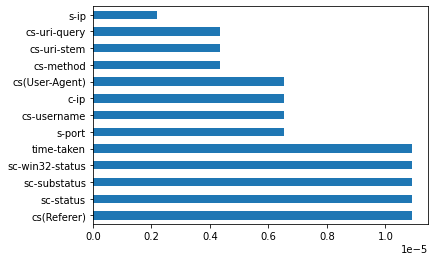

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

## Columns in CSV

In [ ]:
logs.columns

Index(['Date', 'Time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'],
      dtype='object')

In [ ]:
Statuses = logs['sc-status']
Statuses = Statuses.unique()
len(Statuses)

20

In [ ]:
Statuses

array([200, 400, 304, 206, 500, 429, 401, 301, 502, nan, 404.0, '200',
       '206', '304', '429', '400', '502', '500', '301', 'cs(Referer)'],
      dtype=object)

In [ ]:
Status_Counts=logs['sc-status'].value_counts()
Status_Counts

200            280788
200             53015
206             52592
304             22709
502             20350
400             16364
206              8672
304              3600
429               243
500               118
400               110
429                44
301                36
500                29
301                15
401                12
502                12
404.0               2
cs(Referer)         1
Name: sc-status, dtype: int64

In [ ]:
Status_Counts = pd.DataFrame(Status_Counts)

In [ ]:
column_names=['Status']
Status_Counts.columns = column_names

In [ ]:
Status_Counts.describe()

,Status
count,19.000000
mean,24142.736842
std,64390.174136
min,1.000000
25%,22.000000
50%,118.000000
75%,18357.000000
max,280788.000000


In [ ]:
Status_Counts.columns

Index(['Status'], dtype='object')

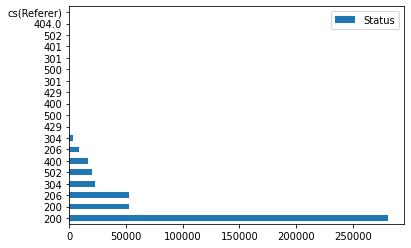

In [ ]:
Status_Counts.plot(kind='barh')

# Cleaning Data

In [ ]:
logs.columns

Index(['Date', 'Time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'],
      dtype='object')

## Date Column

In [ ]:
Dates=logs['Date'].value_counts()
Dates

16-10-2022    458713
#Software:         1
#Version:          1
#Date:             1
#Fields:           1
Name: Date, dtype: int64

In [ ]:
logs = logs[logs.Date != 0]

In [ ]:
logs = logs[logs.Date != '#Software:']
logs = logs[logs.Date != '#Version:']
logs = logs[logs.Date != '#Date:']
logs = logs[logs.Date != '#Fields:']

In [ ]:
Dates=logs['Date'].value_counts()
Dates

16-10-2022    458713
Name: Date, dtype: int64

## Time Column

In [ ]:
Times=logs['Time'].value_counts()
Times

17:52:42    786
13:37:18    674
13:34:05    628
16:05:37    541
13:42:27    442
           ... 
8:16:22       1
8:16:21       1
21:04:28      1
8:16:15       1
7:26:17       1
Name: Time, Length: 57000, dtype: int64

## s-ip Column

In [ ]:
ServerIP=logs['s-ip'].value_counts()
ServerIP

144.76.234.124    458713
Name: s-ip, dtype: int64

## cs-method Column

In [ ]:
Methods=logs['cs-method'].value_counts()
Methods

GET     451727
POST      6981
HEAD         5
Name: cs-method, dtype: int64

## cs-uri-stem Column

In [ ]:
URI_Stem=logs['cs-uri-stem'].value_counts()
URI_Stem

/api/MessagesInfoScreen/GetActiveMessagesCountByMasjidId    70986
/api/Masjid/GetDetaisByGuidId                               50027
/ngsw.json                                                  40287
/api/Updates/GetUpdatedTimesofSystem                        38616
/api/TimingsInfoScreen/GetMasjidTimings                     31955
                                                            ...  
/Uploads/324e4c8b-7e06-48e2-bbac-6364e27e7e87-NWIA.jpg          1
/Uploads/5959a9d9-8bf4-459b-8e3c-c5818adaff6c-C975A.jpg         1
/timingscreen/141e15a4-d52b-4de5-bbb9-70006f15b0f2              1
/timingscreen/8e4f19eb-445a-4f8b-801e-7ce87420c5dc              1
/timingscreen/f2a9ea59-4cd0-4ba2-bdf2-564c4459ac0d              1
Name: cs-uri-stem, Length: 1460, dtype: int64

## cs-uri-query Column

In [ ]:
URI_Query=logs['cs-uri-query'].value_counts()
URI_Query

-                                                           183997
guidId=9224d024-22d3-4921-9035-85ce510ada05                   4703
guidId=9adfcd42-a7bf-42d1-ae25-3f24c4d30bf4                   4284
GuidId=9224d024-22d3-4921-9035-85ce510ada05                   2961
masjidGuid=9224d024-22d3-4921-9035-85ce510ada05&typeId=3      2936
                                                             ...  
ngsw-cache-bust=0.9271438026215968                               1
ngsw-cache-bust=0.39408220907362024                              1
ngsw-cache-bust=0.4691505591655265                               1
ngsw-cache-bust=0.5958023249356437                               1
ngsw-cache-bust=0.31141076899023634                              1
Name: cs-uri-query, Length: 48293, dtype: int64

## s-port Column

In [ ]:
Server_Port=logs['s-port'].value_counts()
Server_Port

443    393179
443     65482
80         37
80         15
Name: s-port, dtype: int64

## cs-username Column (Can drop, possibly)

In [ ]:
User_Name=logs['cs-username'].value_counts()
User_Name

-    458713
Name: cs-username, dtype: int64

## c-ip Column

In [ ]:
Client_IP=logs['c-ip'].value_counts()
Client_IP

188.181.122.11    18815
95.147.7.9         2882
101.166.27.79       933
83.137.6.169        850
50.49.108.202       804
                  ...  
92.40.200.117         1
172.58.224.167        1
85.146.15.40          1
46.195.79.109         1
88.12.54.146          1
Name: c-ip, Length: 17908, dtype: int64

## cs(User-Agent) Column

In [ ]:
User_Agent=logs['cs(User-Agent)'].value_counts()
User_Agent

okhttp/4.9.0                                                                                                                                                     69494
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+15_6_1+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML,+like+Gecko)                                                                51277
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+16_0+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML,+like+Gecko)                                                                  21440
Mozilla/5.0+(X11;+Linux+armv7l)+AppleWebKit/537.36+(KHTML,+like+Gecko)+OptiSigns/5.1.3+Chrome/94.0.4606.81+Electron/15.3.2+Safari/537.36                         16005
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+16_0_2+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML,+like+Gecko)                                                                13428
                                                                                                                                                                 ... 

## cs(Referer) Column

In [ ]:
Referer=logs['cs(Referer)'].value_counts()
Referer

-                                                                                               110901
https://time.my-masjid.com/ngsw-worker.js                                                        74373
https://time.my-masjid.com/                                                                      20020
https://time.my-masjid.com/timingscreen/9adfcd42-a7bf-42d1-ae25-3f24c4d30bf4?sound=0&isapp=1     12948
https://time.my-masjid.com/timingscreen/9224d024-22d3-4921-9035-85ce510ada05                     11786
                                                                                                 ...  
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-icons-core.css                1
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-icons-variables.css           1
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-icons-wind.css                1
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-ic

## sc-status Column (Needs Cleaning, Where 'sc-status' == '404.0')

In [ ]:
Status=logs['sc-status'].value_counts()
Status

200      280788
200       53015
206       52592
304       22709
502       20350
400       16364
206        8672
304        3600
429         243
500         118
400         110
429          44
301          36
500          29
301          15
502          12
401          12
404.0         2
Name: sc-status, dtype: int64

In [ ]:
logs404 = logs[logs['sc-status'] == 404]

In [ ]:
logs404

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
103404,16-10-2022,7:00:33,144.76.234.124,GET,/.well-known/traffic-advice,-,443,-,74.125.208.48,Chrome+Privacy+Preserving+Prefetch+Proxy,-,404.0,0.0,2.0,15.0
162494,16-10-2022,11:21:26,144.76.234.124,GET,/.well-known/assetlinks.json,-,443,-,66.249.66.204,Mozilla/5.0+(compatible;+Googlebot/2.1;++http:...,-,404,0,2,93


## sc-substatus Column

In [ ]:
SubStatus=logs['sc-substatus'].value_counts()
SubStatus

0    372864
0     65485
3     20350
3        12
Name: sc-substatus, dtype: int64

## sc-win32-status Column

In [ ]:
Win32_Status=logs['sc-win32-status'].value_counts()
Win32_Status

0        347159
0         64673
64        23257
12030      8239
12002      7666
1236       3049
121        2258
12029      1129
64          548
995         400
121         100
995          91
1236         82
10054        37
22           16
1450          2
2.0           2
12029         2
12030         1
Name: sc-win32-status, dtype: int64

## time-taken Column

In [ ]:
Time_Taken=logs['time-taken'].value_counts()
Time_Taken

46        17692
62        14588
78        12356
31        11323
93        10957
          ...  
84902         1
103762        1
100418        1
41868         1
4844          1
Name: time-taken, Length: 46721, dtype: int64

In [ ]:
Time_test = logs[logs['time-taken'] == 0]
Time_test = Time_test[Time_test['sc-status'] == 200]

In [ ]:
Time_test['time-taken'].value_counts()

0.0    24
Name: time-taken, dtype: int64

# Assigning Log Sections to Separate Data Frames grouped by Status + Type fixing

In [ ]:
Status_Counts

,Status
200,280788
200,53015
206,52592
304,22709
502,20350
400,16364
206,8672
304,3600
429,243
500,118


## Aggregating all Statuses into respective DataFrames

In [ ]:
Status_200_ints = logs[logs['sc-status'] == 200]
Status_200_strings = logs[logs['sc-status'] == '200']
Status_200 = Status_200_ints.append(Status_200_strings)
Status_200 = pd.DataFrame(Status_200)
Status_200['sc-status'].astype(int)
Status_200['sc-status'] = pd.to_numeric(Status_200['sc-status'])
Status_200.tail(1)

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
458715,16-10-2022,23:59:59,144.76.234.124,GET,/api/MessagesInfoScreen/GetActiveMessagesCount...,masjidGuid=46c4af4e-e99e-4c13-8ade-64d45a0cbf95,443,-,72.143.238.23,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+15_6_1+like...,https://time.my-masjid.com/timingscreen/46c4af...,200.0,0,0,890


In [ ]:
Status_206_ints = logs[logs['sc-status'] == 206]
Status_206_strings = logs[logs['sc-status'] == '206']
Status_206 = Status_206_ints.append(Status_206_strings)
Status_206 = pd.DataFrame(Status_206)
Status_206['sc-status'].astype(int)
Status_206['sc-status'] = pd.to_numeric(Status_206['sc-status'])
Status_206.tail(1)

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
458716,16-10-2022,23:59:59,144.76.234.124,GET,/assets/audio/sound_iqamah.mp3,-,443,-,80.6.176.106,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+16_0_2+like...,https://time.my-masjid.com/timingscreen/665ae9...,206.0,0,0,312


In [ ]:
Status_301_ints = logs[logs['sc-status'] == 301]
Status_301_strings = logs[logs['sc-status'] == '301']
Status_301 = Status_301_ints.append(Status_301_strings)
Status_301 = pd.DataFrame(Status_301)
Status_301['sc-status'].astype(int)
Status_301['sc-status'] = pd.to_numeric(Status_301['sc-status'])
Status_301.tail(1)

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
456770,16-10-2022,23:51:19,144.76.234.124,GET,/,-,80,-,157.55.39.137,"Mozilla/5.0+AppleWebKit/537.36+(KHTML,+like+Ge...",-,301.0,0,0,187


In [ ]:
Status_304_ints = logs[logs['sc-status'] == 304]
Status_304_strings = logs[logs['sc-status'] == '304']
Status_304 = Status_304_ints.append(Status_304_strings)
Status_304 = pd.DataFrame(Status_304)
Status_304['sc-status'].astype(int)
Status_304['sc-status'] = pd.to_numeric(Status_304['sc-status'])
Status_304.tail(1)

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
458689,16-10-2022,23:59:53,144.76.234.124,GET,/Uploads/06966a26-3007-4ff4-b3d3-f0a99ad5fd63-...,-,443,-,213.40.60.252,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+15_5+like+M...,https://time.my-masjid.com/timingscreen/9887ae...,304.0,0,0,31


In [ ]:
Status_400_ints = logs[logs['sc-status'] == 400]
Status_400_strings = logs[logs['sc-status'] == '400']
Status_400 = Status_400_ints.append(Status_400_strings)
Status_400 = pd.DataFrame(Status_400)
Status_400['sc-status'].astype(int)
Status_400['sc-status'] = pd.to_numeric(Status_400['sc-status'])
Status_400.tail(1)

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
458624,16-10-2022,23:59:37,144.76.234.124,GET,/api/MessagesInfoScreen/GetAllMessages,GuidId=c01a4443-9aa9-4763-a7bb-05eaae7be171&Us...,443,-,50.93.20.72,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+15_6_1+like...,https://time.my-masjid.com/,400.0,0,64,2281


In [ ]:
#401
Status_401_ints = logs[logs['sc-status'] == 401]
Status_401_strings = logs[logs['sc-status'] == '401']
Status_401 = Status_401_ints.append(Status_401_strings)
Status_401 = pd.DataFrame(Status_401)
Status_401['sc-status'].astype(int)
Status_401['sc-status'] = pd.to_numeric(Status_401['sc-status'])
Status_401.tail(1)

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
354737,16-10-2022,17:32:20,144.76.234.124,GET,/api/Messages/GetAllMessages,masjidId=20256,443,-,82.7.147.173,Mozilla/5.0+(Macintosh;+Intel+Mac+OS+X+10_13_6...,https://time.my-masjid.com/dashboard/allmessages,401,0,0,20819


In [ ]:
#404
Status_404_ints = logs[logs['sc-status'] == 404]
Status_404_strings = logs[logs['sc-status'] == '404']
Status_404 = Status_404_ints.append(Status_404_strings)
Status_404 = pd.DataFrame(Status_404)
Status_404['sc-status'].astype(int)
Status_404['sc-status'] = pd.to_numeric(Status_404['sc-status'])
Status_404.tail(1)

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
162494,16-10-2022,11:21:26,144.76.234.124,GET,/.well-known/assetlinks.json,-,443,-,66.249.66.204,Mozilla/5.0+(compatible;+Googlebot/2.1;++http:...,-,404.0,0,2,93


In [ ]:
#429
Status_429_ints = logs[logs['sc-status'] == 429]
Status_429_strings = logs[logs['sc-status'] == '429']
Status_429 = Status_429_ints.append(Status_429_strings)
Status_429 = pd.DataFrame(Status_429)
Status_429['sc-status'].astype(int)
Status_429['sc-status'] = pd.to_numeric(Status_429['sc-status'])
Status_429.tail(1)

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
455211,16-10-2022,23:44:54,144.76.234.124,GET,/api/MessagesInfoScreen/GetAllMessages,GuidId=340f07ba-79ed-4d17-aafd-5cc679626141&Us...,443,-,83.254.139.255,Mozilla/5.0+(Linux;+Android+10;+VOG-L29+Build/...,https://time.my-masjid.com/429,429.0,0,0,62


In [ ]:
#500
Status_500_ints = logs[logs['sc-status'] == 500]
Status_500_strings = logs[logs['sc-status'] == '500']
Status_500 = Status_500_ints.append(Status_500_strings)
Status_500 = pd.DataFrame(Status_500)
Status_500['sc-status'].astype(int)
Status_500['sc-status'] = pd.to_numeric(Status_500['sc-status'])
Status_500.tail(1)

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
458035,16-10-2022,23:56:47,144.76.234.124,POST,/api/Device/Delete,-,443,-,199.126.20.84,MyMasjid/1.8+(com.teo-intl.my-masjid;+build:9;...,-,500.0,0,0,1406


In [ ]:
#502
Status_502_ints = logs[logs['sc-status'] == 502]
Status_502_strings = logs[logs['sc-status'] == '502']
Status_502 = Status_502_ints.append(Status_502_strings)
Status_502 = pd.DataFrame(Status_502)
Status_502['sc-status'].astype(int)
Status_502['sc-status'] = pd.to_numeric(Status_502['sc-status'])
Status_502.tail(1)

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
444731,16-10-2022,22:59:09,144.76.234.124,GET,/api/TimingsInfoScreen/GetMasjidTimings,GuidId=9224d024-22d3-4921-9035-85ce510ada05,443,-,188.181.122.11,Mozilla/5.0+(X11;+Linux+armv7l)+AppleWebKit/53...,https://time.my-masjid.com/timingscreen/9224d0...,502.0,3,64,27322


## Appending all DataFrames back into one, After cleaning

In [ ]:
# All cleaned frames
frames = [Status_200, Status_206, Status_301, Status_304, Status_400, Status_401, Status_404, Status_429, Status_500,Status_502]

#new dataframe to store append result
logsCleaned = pd.DataFrame()

for df in frames:
    logsCleaned = logsCleaned.append(df)

print("Dataframes appended.")

Dataframes appended.


In [ ]:
logsCleaned['sc-status'].value_counts()

200.0    333803
206.0     61264
304.0     26309
502.0     20362
400.0     16474
429.0       287
500.0       147
301.0        51
401.0        12
404.0         2
Name: sc-status, dtype: int64

In [ ]:
print("Total Rows of Data:",len(logsCleaned))

Total Rows of Data: 458711


## Checking Column Types



In [ ]:
logsCleaned.columns

Index(['Date', 'Time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'],
      dtype='object')

In [ ]:
logsCleaned['Date'] = pd.to_datetime(logsCleaned['Date'])
logsCleaned['Date'].value_counts()

2022-10-16    458711
Name: Date, dtype: int64

In [ ]:
logsCleaned['Time'] = pd.to_datetime(logsCleaned['Time'],format= '%H:%M:%S' ).dt.time
logsCleaned['Time'].value_counts()

17:52:42    786
13:37:18    674
13:34:05    628
16:05:37    541
13:42:27    442
           ... 
22:09:58      1
22:09:55      1
11:22:09      1
11:22:10      1
02:19:02      1
Name: Time, Length: 57000, dtype: int64

In [ ]:
logsCleaned['s-ip'] = logsCleaned['s-ip'].astype(str)
logsCleaned['s-ip'].value_counts()

144.76.234.124    458711
Name: s-ip, dtype: int64

In [ ]:
logsCleaned['cs-method'] = logsCleaned['cs-method'].astype(str)
logsCleaned['cs-method'].value_counts()

GET     451725
POST      6981
HEAD         5
Name: cs-method, dtype: int64

In [ ]:
logsCleaned['cs-uri-stem'] = logsCleaned['cs-uri-stem'].astype(str)
logsCleaned['cs-uri-stem'].value_counts()

/api/MessagesInfoScreen/GetActiveMessagesCountByMasjidId             70986
/api/Masjid/GetDetaisByGuidId                                        50027
/ngsw.json                                                           40287
/api/Updates/GetUpdatedTimesofSystem                                 38616
/api/TimingsInfoScreen/GetMasjidTimings                              31955
                                                                     ...  
/widget/assets/fonts/montserrat/assets/css/blue-dark.css                 1
/widget/assets/fonts/montserrat/assets/fonts/montserrat/fonts.css        1
/widget/assets/fonts/montserrat/styles.6efe6dd2a8631017f48d.css          1
/timingscreen/assets/css/assets/css/style.css                            1
/timingscreen/8e4f19eb-445a-4f8b-801e-7ce87420c5dc                       1
Name: cs-uri-stem, Length: 1460, dtype: int64

In [ ]:
logsCleaned['cs-uri-query'] = logsCleaned['cs-uri-query'].astype(str)
logsCleaned['cs-uri-query'].value_counts()

-                                                           183995
guidId=9224d024-22d3-4921-9035-85ce510ada05                   4703
guidId=9adfcd42-a7bf-42d1-ae25-3f24c4d30bf4                   4284
GuidId=9224d024-22d3-4921-9035-85ce510ada05                   2961
masjidGuid=9224d024-22d3-4921-9035-85ce510ada05&typeId=3      2936
                                                             ...  
ngsw-cache-bust=0.8225925191639814                               1
ngsw-cache-bust=0.7612931956234938                               1
ngsw-cache-bust=0.8871552283229565                               1
ngsw-cache-bust=0.12834212805274103                              1
ngsw-cache-bust=0.917559957489108                                1
Name: cs-uri-query, Length: 48293, dtype: int64

In [ ]:
logsCleaned['s-port'] = logsCleaned['s-port'].astype(int)
logsCleaned['s-port'].value_counts()

443    458660
80         51
Name: s-port, dtype: int64

In [ ]:
logsCleaned['cs-username'] = logsCleaned['cs-username'].astype(str)
logsCleaned['cs-username'].value_counts()

-    458711
Name: cs-username, dtype: int64

In [ ]:
logsCleaned['c-ip'] = logsCleaned['c-ip'].astype(str)
logsCleaned['c-ip'].value_counts()

188.181.122.11     18815
95.147.7.9          2882
101.166.27.79        933
83.137.6.169         850
50.49.108.202        804
                   ...  
37.250.127.94          1
39.40.54.198           1
46.193.32.82           1
188.189.206.168        1
78.156.8.93            1
Name: c-ip, Length: 17907, dtype: int64

In [ ]:
logsCleaned['cs(User-Agent)'] = logsCleaned['cs(User-Agent)'].astype(str)
logsCleaned['cs(User-Agent)'].value_counts()

okhttp/4.9.0                                                                                                                                            69494
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+15_6_1+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML,+like+Gecko)                                                       51277
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+16_0+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML,+like+Gecko)                                                         21440
Mozilla/5.0+(X11;+Linux+armv7l)+AppleWebKit/537.36+(KHTML,+like+Gecko)+OptiSigns/5.1.3+Chrome/94.0.4606.81+Electron/15.3.2+Safari/537.36                16005
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+16_0_2+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML,+like+Gecko)                                                       13428
                                                                                                                                                        ...  
Dalvik/2.1.0+(Linux;+U;+Android+11;+SM-G975F+Build/R

In [ ]:
logsCleaned['cs(Referer)'] = logsCleaned['cs(Referer)'].astype(str)
logsCleaned['cs(Referer)'].value_counts()

-                                                                                               110901
https://time.my-masjid.com/ngsw-worker.js                                                        74373
https://time.my-masjid.com/                                                                      20020
https://time.my-masjid.com/timingscreen/9adfcd42-a7bf-42d1-ae25-3f24c4d30bf4?sound=0&isapp=1     12948
https://time.my-masjid.com/timingscreen/9224d024-22d3-4921-9035-85ce510ada05                     11786
                                                                                                 ...  
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-icons-variables.css           1
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-icons-wind.css                1
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-icons-wind.min.css            1
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-ic

In [ ]:
logsCleaned['sc-status'] = logsCleaned['sc-status'].astype(int)
logsCleaned['sc-status'].value_counts()

200    333803
206     61264
304     26309
502     20362
400     16474
429       287
500       147
301        51
401        12
404         2
Name: sc-status, dtype: int64

In [ ]:
logsCleaned['sc-substatus'] = logsCleaned['sc-substatus'].astype(int)
logsCleaned['sc-substatus'].value_counts()

0    438349
3     20362
Name: sc-substatus, dtype: int64

In [ ]:
logsCleaned['sc-win32-status'] = logsCleaned['sc-win32-status'].astype(int)
logsCleaned['sc-win32-status'].value_counts()

0        411832
64        23805
12030      8240
12002      7666
1236       3131
121        2358
12029      1131
995         491
10054        37
22           16
1450          2
2             2
Name: sc-win32-status, dtype: int64

In [ ]:
logsCleaned['time-taken'] = logsCleaned['time-taken'].astype(int)
logsCleaned['time-taken'].value_counts()

46        22240
62        17864
78        14949
31        14313
93        13157
          ...  
101155        1
119412        1
96359         1
99155         1
27322         1
Name: time-taken, Length: 43866, dtype: int64

# New Column for Date Time (Date + Time Concatenated)

In [ ]:
logsCleaned['DateTime'] = logsCleaned['Date'].astype(str) + " " + logsCleaned['Time'].astype(str)

In [ ]:
logsCleaned['DateTime'] = pd.to_datetime(logsCleaned['DateTime'])

In [ ]:
logsCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458711 entries, 0 to 444731
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             458711 non-null  datetime64[ns]
 1   Time             458711 non-null  object        
 2   s-ip             458711 non-null  object        
 3   cs-method        458711 non-null  object        
 4   cs-uri-stem      458711 non-null  object        
 5   cs-uri-query     458711 non-null  object        
 6   s-port           458711 non-null  int64         
 7   cs-username      458711 non-null  object        
 8   c-ip             458711 non-null  object        
 9   cs(User-Agent)   458711 non-null  object        
 10  cs(Referer)      458711 non-null  object        
 11  sc-status        458711 non-null  int64         
 12  sc-substatus     458711 non-null  int64         
 13  sc-win32-status  458711 non-null  int64         
 14  time-taken       458

## Rearranging Columns after adding new DateTime column

In [ ]:
logsCleaned = logsCleaned[['Date', 'Time', 'DateTime','s-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken']]

In [ ]:
logsCleaned.tail()

,Date,Time,DateTime,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
417544,2022-10-16,21:12:17,2022-10-16 21:12:17,144.76.234.124,GET,/api/Masjid/GetDetaisByGuidId,guidId=c01a4443-9aa9-4763-a7bb-05eaae7be171,443,-,172.219.228.103,Mozilla/5.0+(Linux;+Android+12;+SAMSUNG+SM-A52...,https://time.my-masjid.com/timingscreen/c01a44...,502,3,64,22189
417545,2022-10-16,21:12:17,2022-10-16 21:12:17,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=4740249c-0f06-46f6-bdad-2074c72d95c9&de...,443,-,87.49.45.186,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+15_5+like+M...,https://time.my-masjid.com/timingscreen/474024...,502,3,64,20330
417549,2022-10-16,21:12:17,2022-10-16 21:12:17,144.76.234.124,GET,/api/Messages/GetMasjidMessagesByTypeId,masjidGuid=c01a4443-9aa9-4763-a7bb-05eaae7be17...,443,-,172.219.228.103,Mozilla/5.0+(Linux;+Android+12;+SAMSUNG+SM-A52...,https://time.my-masjid.com/timingscreen/c01a44...,502,3,64,22221
417551,2022-10-16,21:12:17,2022-10-16 21:12:17,144.76.234.124,GET,/api/TimingsInfoScreen/GetMasjidTimings,GuidId=c01a4443-9aa9-4763-a7bb-05eaae7be171,443,-,172.219.228.103,Mozilla/5.0+(Linux;+Android+12;+SAMSUNG+SM-A52...,https://time.my-masjid.com/timingscreen/c01a44...,502,3,64,22283
444731,2022-10-16,22:59:09,2022-10-16 22:59:09,144.76.234.124,GET,/api/TimingsInfoScreen/GetMasjidTimings,GuidId=9224d024-22d3-4921-9035-85ce510ada05,443,-,188.181.122.11,Mozilla/5.0+(X11;+Linux+armv7l)+AppleWebKit/53...,https://time.my-masjid.com/timingscreen/9224d0...,502,3,64,27322


# Separating Backend Logs from frontend Logs using Column 'cs-uri-stem'

Backend: Values that start with /api/
<br>Frontend: Values that dont start with /api/

In [ ]:
BackendLogs = logsCleaned[logsCleaned['cs-uri-stem'].str.contains('/api/')]
BackendLogs.shape

(257672, 16)

In [ ]:
FrontendLogs = logsCleaned[~logsCleaned['cs-uri-stem'].str.contains('/api/')]
FrontendLogs.shape

(201039, 16)

# Viewing Backend and Frontend separated logs

In [ ]:
print('Total          Cleaned Logs (Rows) are:',len(logsCleaned))
print('Total BackEnd  Cleaned Logs (Rows) are:',len(BackendLogs))
print('Total FrontEnd Cleaned Logs (Rows) are:',len(FrontendLogs))

Total          Cleaned Logs (Rows) are: 458711
Total BackEnd  Cleaned Logs (Rows) are: 257672
Total FrontEnd Cleaned Logs (Rows) are: 201039


In [ ]:
BackendLogs.head(5)

,Date,Time,DateTime,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
0,2022-10-16,00:00:00,2022-10-16 00:00:00,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=8633067e-9d05-4a65-a0a0-a8499305f9ff,443,-,192.38.129.198,okhttp/4.9.0,-,200,0,0,140
3,2022-10-16,00:00:00,2022-10-16 00:00:00,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=4cf1bfce-34cf-4bd3-ab85-e380ee4d94e8,443,-,192.38.129.57,okhttp/4.9.0,-,200,0,0,156
7,2022-10-16,00:00:00,2022-10-16 00:00:00,144.76.234.124,GET,/api/MessagesInfoScreen/GetActiveMessagesCount...,masjidGuid=c01a4443-9aa9-4763-a7bb-05eaae7be171,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,1390
18,2022-10-16,00:00:02,2022-10-16 00:00:02,144.76.234.124,GET,/api/TimingsInfoScreen/GetMasjidTimings,GuidId=9224d024-22d3-4921-9035-85ce510ada05,443,-,188.181.122.11,Mozilla/5.0+(X11;+Linux+armv7l)+AppleWebKit/53...,https://time.my-masjid.com/timingscreen/9224d0...,200,0,0,3265
20,2022-10-16,00:00:02,2022-10-16 00:00:02,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=44bd9895-7215-4f34-950d-5cd1abf0fd86,443,-,80.164.117.31,okhttp/4.9.0,-,200,0,0,62


In [ ]:
FrontendLogs.head(5)

,Date,Time,DateTime,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
1,2022-10-16,00:00:00,2022-10-16,144.76.234.124,GET,/assets/fonts/montserrat/montserrat-extrabold-...,-,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,156
2,2022-10-16,00:00:00,2022-10-16,144.76.234.124,GET,/ngsw.json,ngsw-cache-bust=0.1322625226362878,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,156
4,2022-10-16,00:00:00,2022-10-16,144.76.234.124,GET,/assets/audio/sound_adhan.mp3,-,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,250
5,2022-10-16,00:00:00,2022-10-16,144.76.234.124,GET,/assets/audio/sound_iqamah_warning.mp3,-,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,250
6,2022-10-16,00:00:00,2022-10-16,144.76.234.124,GET,/assets/audio/sound_iqamah.mp3,-,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,250


# Exporting Cleaned Datasets to CSV

In [ ]:
#logsCleaned.to_csv('Total_Logs_Cleaned.csv', encoding='utf-8-sig',index=False,header=False)
BackendLogs.to_csv('BackEnd_Logs_Cleaned.csv', encoding='utf-8-sig',index=False,header=False)
FrontendLogs.to_csv('FrontEnd_Logs_Cleaned.csv', encoding='utf-8-sig',index=False,header=False)

# Download files
#files.download('FrontEnd_Logs_Cleaned.csv')
#files.download('BackEnd_Logs_Cleaned.csv')
#files.download('Total_Logs_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exporting Cleaned Datasets to Google Cloud Storage

In [ ]:
# Google Colab -> GCP Bucket Storage
# print("\n> Copying BackEnd_Logs_Cleaned.csv to Google Cloud Storage bucket: gs://mymasjid-logs-october/Logs-Data/ \n")
# !gsutil cp BackEnd_Logs_Cleaned.csv gs://mymasjid-logs-october/Logs-Data/
# print("\n> BackEnd_Logs_Cleaned.csv Copied!\n")

# print("\n> Copying FrontEnd_Logs_Cleaned.csv to Google Cloud Storage bucket: gs://mymasjid-logs-october/Logs-Data/ \n")
# !gsutil cp FrontEnd_Logs_Cleaned.csv gs://mymasjid-logs-october/Logs-Data/
# print("\n> FrontEnd_Logs_Cleaned.csv Copied!\n")